In [1]:
!pwd

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/rec images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/rec images/emotions.csv
/content/drive/MyDrive/rec images/images/18/Neutral.jpg
/content/drive/MyDrive/rec images/images/18/Happy.jpg
/content/drive/MyDrive/rec images/images/18/Disgust.jpg
/content/drive/MyDrive/rec images/images/18/Contempt.jpg
/content/drive/MyDrive/rec images/images/18/Sad.jpg
/content/drive/MyDrive/rec images/images/18/Surprised.jpg
/content/drive/MyDrive/rec images/images/18/Anger.jpg
/content/drive/MyDrive/rec images/images/18/Fear.jpg
/content/drive/MyDrive/rec images/images/5/Surprised.jpg
/content/drive/MyDrive/rec images/images/5/Contempt.jpg
/content/drive/MyDrive/rec images/images/5/Fear.jpg
/content/drive/MyDrive/rec images/images/5/Happy.jpg
/content/drive/MyDrive/rec images/images/5/Anger.jpg
/content/drive/MyDrive/rec images/images/5/Neutral.jpg
/content/drive/MyDrive/rec images/images/5/Sad.jpg
/content/drive/MyDrive/rec images/images/5/Disgust.jpg
/content/drive/MyDrive/rec images/images/2/Anger.jpg
/content/drive/MyDrive/rec i

In [6]:
DATA_DIR = '/content/drive/MyDrive/rec images/images'
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
IMG_SIZE = 48

In [7]:
def load_data():
    images = []
    labels = []

    for emotion_label, emotion in enumerate(EMOTIONS):
        # Get the directory for the current emotion
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if os.path.isdir(emotion_dir):
            for img_file in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_file)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized)
                labels.append(emotion_label)  # Assigning label based on index
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")

    return np.array(images), np.array(labels)

# Load the data
images, labels = load_data()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data for CNN input
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Number of images: 64
Shape of images array: (64, 48, 48)
Number of labels: 64


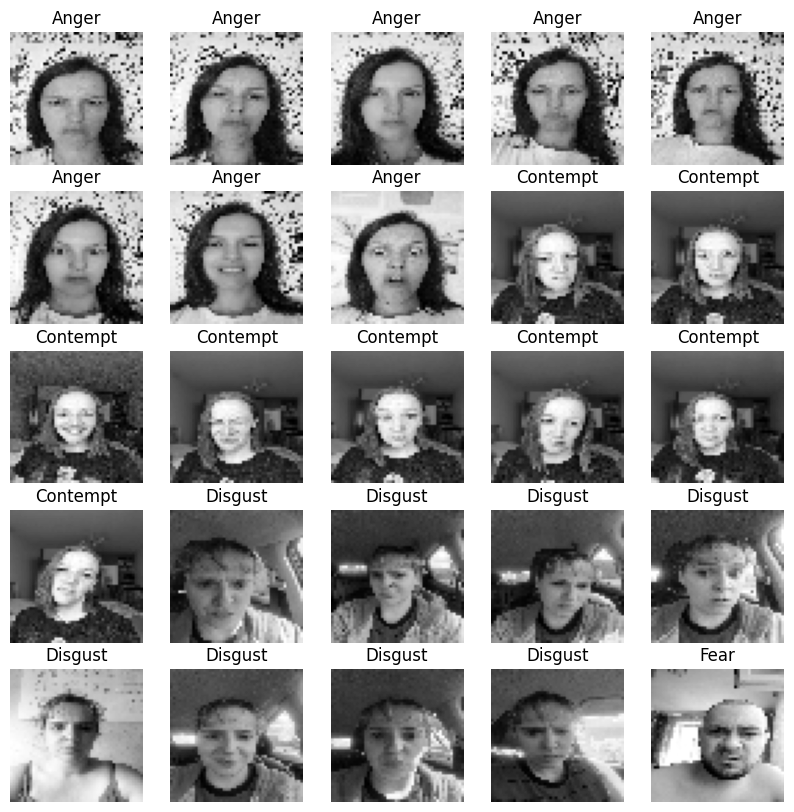

In [8]:
# Print information about the dataset
print("Number of images:", len(images))
print("Shape of images array:", images.shape)
print("Number of labels:", len(labels))

# Print sample images and their corresponding labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(EMOTIONS[labels[i]])
    plt.axis('off')
plt.show()

In [9]:
# design a CNN architecture with multiple layers (e.g., convolutional, pooling, fully connected).

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN architecture
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(EMOTIONS), activation='softmax'))

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

In [10]:
#  Train the model on
# a large dataset (e.g., CIFAR-10, ImageNet)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Save the trained model
model.save('emotion_recognition_model.h5')


Epoch 1/10
2/2 [==============================] - 5s 637ms/step - loss: 2.0949 - accuracy: 0.0980 - val_loss: 2.0672 - val_accuracy: 0.3077
Epoch 2/10
2/2 [==============================] - 0s 31ms/step - loss: 2.0503 - accuracy: 0.2549 - val_loss: 2.0225 - val_accuracy: 0.3846
Epoch 3/10
2/2 [==============================] - 0s 32ms/step - loss: 2.0151 - accuracy: 0.3725 - val_loss: 1.9889 - val_accuracy: 0.3846
Epoch 4/10
2/2 [==============================] - 0s 28ms/step - loss: 1.9493 - accuracy: 0.4118 - val_loss: 1.9329 - val_accuracy: 0.5385
Epoch 5/10
2/2 [==============================] - 0s 28ms/step - loss: 1.8548 - accuracy: 0.6275 - val_loss: 1.8240 - val_accuracy: 0.5385
Epoch 6/10
2/2 [==============================] - 0s 30ms/step - loss: 1.7349 - accuracy: 0.6275 - val_loss: 1.6101 - val_accuracy: 0.5385
Epoch 7/10
2/2 [==============================] - 0s 27ms/step - loss: 1.5429 - accuracy: 0.6471 - val_loss: 1.3372 - val_accuracy: 0.6154
Epoch 8/10
2/2 [==========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/emotion_recognition_model.h5')

# Define function to preprocess input image
def preprocess_image(img_path):
    # Load the image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    # Normalize the pixel values
    img_normalized = img_resized / 255.0
    # Reshape the image for model input
    img_reshaped = img_normalized.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    return img_reshaped

# Provide path to your input image
input_img_path = '/content/drive/MyDrive/rec images/images/0/Anger.jpg'

# Preprocess the input image
input_img = preprocess_image(input_img_path)

# Make prediction using the loaded model
predictions = model.predict(input_img)

# Get the predicted emotion label
predicted_label = EMOTIONS[np.argmax(predictions)]

# Print the predicted label
print("Predicted emotion:", predicted_label)

1/1 [==============================] - 0s 443ms/step
Predicted emotion: Anger


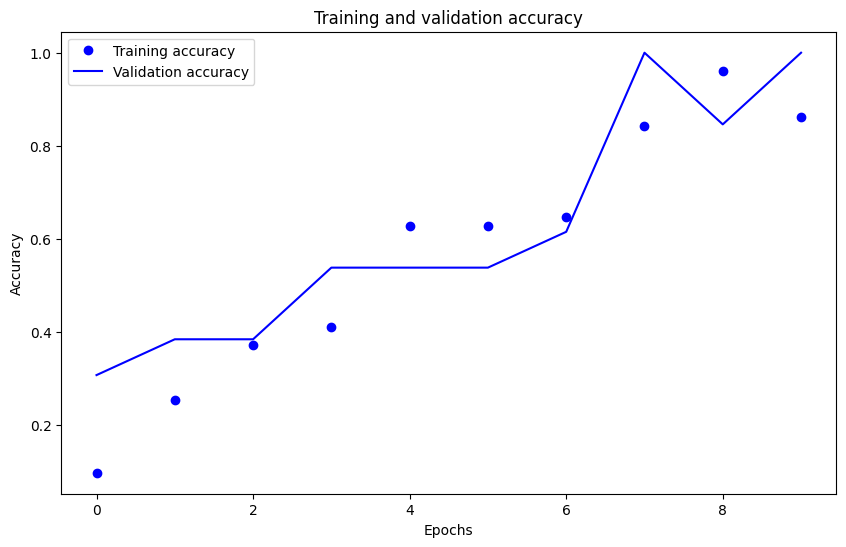

In [12]:
#  model accuracy

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(len(accuracy))

plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
!pip install seaborn

In [19]:
import seaborn as sns

1/1 [==============================] - 0s 34ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



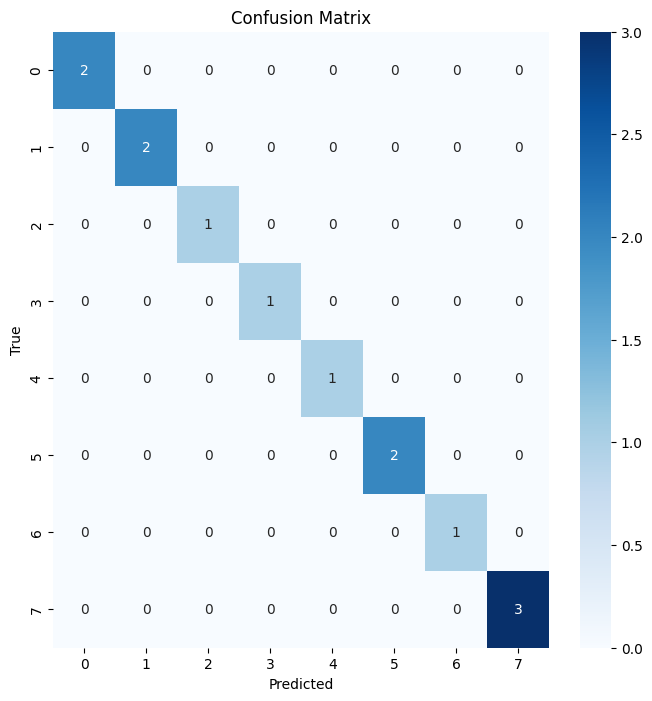

In [20]:
# models precision, recall, and F1-score on a separate test set,

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions for the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes)
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


1/1 [==============================] - 0s 70ms/step


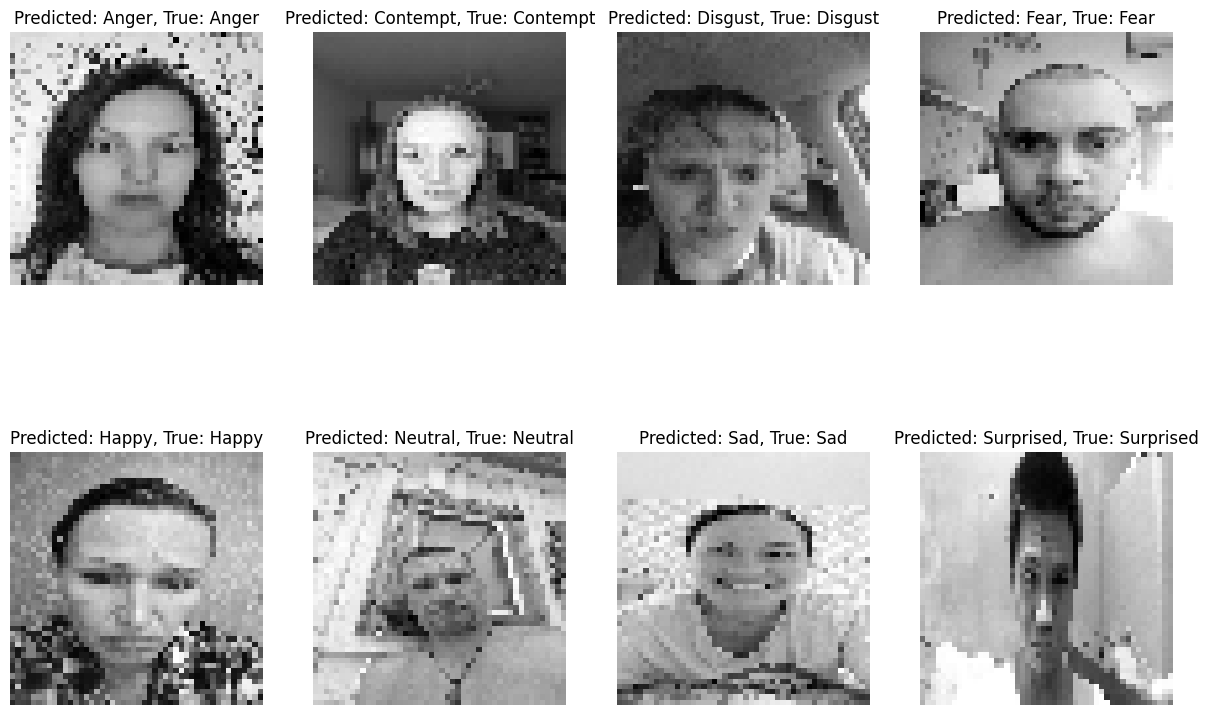

In [23]:
# visualize the model's predictions to
# assess its effectiveness.

import matplotlib.pyplot as plt
import numpy as np
# Visualize the model's predictions

# Get predictions for the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a figure with subplots for each emotion
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

# Iterate through each emotion and plot the images with predicted and true labels
for i, emotion in enumerate(EMOTIONS):
    ax = axs[i // 4, i % 4]

    # Select images with the current emotion label
    images_with_emotion = X_test[y_test == i]

    # Choose a random image
    random_index = np.random.randint(0, len(images_with_emotion))

    # Display the image
    ax.imshow(images_with_emotion[random_index].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')

    # Add title with predicted and true labels
    predicted_label = EMOTIONS[y_pred_classes[y_test == i][random_index]]
    ax.set_title(f"Predicted: {predicted_label}, True: {emotion}")
    ax.axis('off')

# Show the plot
plt.show()
